In [1]:
import pandas as pd
import numpy as np

In [2]:
all_features_df = pd.read_csv("all_features_df.csv")

In [4]:
all_features_df.columns.values

array(['Unnamed: 0', 'user_id', 'exercise_id', 'category', 'difficulty',
       'Cyclomatic_Complexity', 'Halstead_Difficulty', 'Halstead_Effort',
       'Halstead_Volume', 'Halstead_Time', 'SLoC', 'Logical_SLoC',
       'Number_of_Functions', 'Number_of_Classes', 'Number_of_Lines',
       'Number_of_Comments', 'Diff_SLoC_LLoC', 'Maintainability_Index',
       'demanding', 'effort', 'satisfied', 'stress', 'num_bursts',
       'total_keystrokes', 'total_time_seconds',
       'avg_time_between_keystrokes', 'num_deletions', 'num_insertions',
       'edit_ratio', 'num_Enter', 'num_KeyD', 'num_KeyE', 'num_KeyF',
       'num_Space', 'num_KeyC', 'num_KeyO', 'num_KeyU', 'num_KeyN',
       'num_KeyT', 'num_ShiftLeft', 'num_Minus', 'num_KeyV', 'num_KeyW',
       'num_KeyL', 'num_KeyS', 'num_Digit9', 'num_KeyR', 'num_ArrowRight',
       'num_Backspace', 'num_Tab', 'num_ArrowLeft', 'num_Semicolon',
       'num_ArrowDown', 'num_Equal', 'num_BracketLeft',
       'num_BracketRight', 'num_Quote', 'num

In [5]:
important_metrics = ["Number_of_Lines", "Diff_SLoC_LLoC", "Halstead_Effort", "Halstead_Volume"]

code_metrics_df = all_features_df[['user_id', 'exercise_id']+ important_metrics + ['demanding']]
code_metrics_df

,user_id,exercise_id,Number_of_Lines,Diff_SLoC_LLoC,Halstead_Effort,Halstead_Volume,demanding
0,Student_1,586,1,1,0,0,4
1,Student_1,683,30,6,26,24,8
2,Student_1,760,14,3,12,11,7
3,Student_1,434,8,2,8,6,2
4,Student_1,568,14,4,12,10,9
...,...,...,...,...,...,...,...
166,Student_19,568,8,1,6,5,2
167,Student_19,547,10,1,9,7,3
168,Student_19,2171,13,3,8,8,2
169,Student_19,1949,16,3,11,11,3


In [16]:
# Mapping dictionary
exercise_mapping = {
    586: 1,
    683: 2,
    760: 3,
    434: 4,
    568: 5,
    547: 6,
    2171: 7,
    1949: 8,
    2135: 9
}
# Function to map and sort the DataFrame
def map_and_sort_exercise_id(df, mapping):
    # Map the exercise_id column
    df['exercise_id'] = df['exercise_id'].map(mapping)
    
    # Sort the DataFrame based on the mapped exercise_id
    df = df.sort_values(by='exercise_id').reset_index(drop=True)
    
    return df
code_metrics_df = map_and_sort_exercise_id(code_metrics_df, exercise_mapping)

C:\Users\Mr.Khan\AppData\Local\Temp\ipykernel_14260\9388053.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exercise_id'] = df['exercise_id'].map(mapping)


In [17]:
code_metrics_df

,user_id,exercise_id,Number_of_Lines,Diff_SLoC_LLoC,Halstead_Effort,Halstead_Volume,demanding
0,Student_1,1,1,1,0,0,4
1,Student_14,1,0,0,0,0,3
2,Student_5,1,11,1,8,8,1
3,Student_16,1,19,3,14,14,7
4,Student_7,1,17,0,9,9,2
...,...,...,...,...,...,...,...
166,Student_4,9,24,7,17,17,5
167,Student_7,9,22,5,17,17,4
168,Student_12,9,1,1,0,0,4
169,Student_13,9,28,5,21,21,5


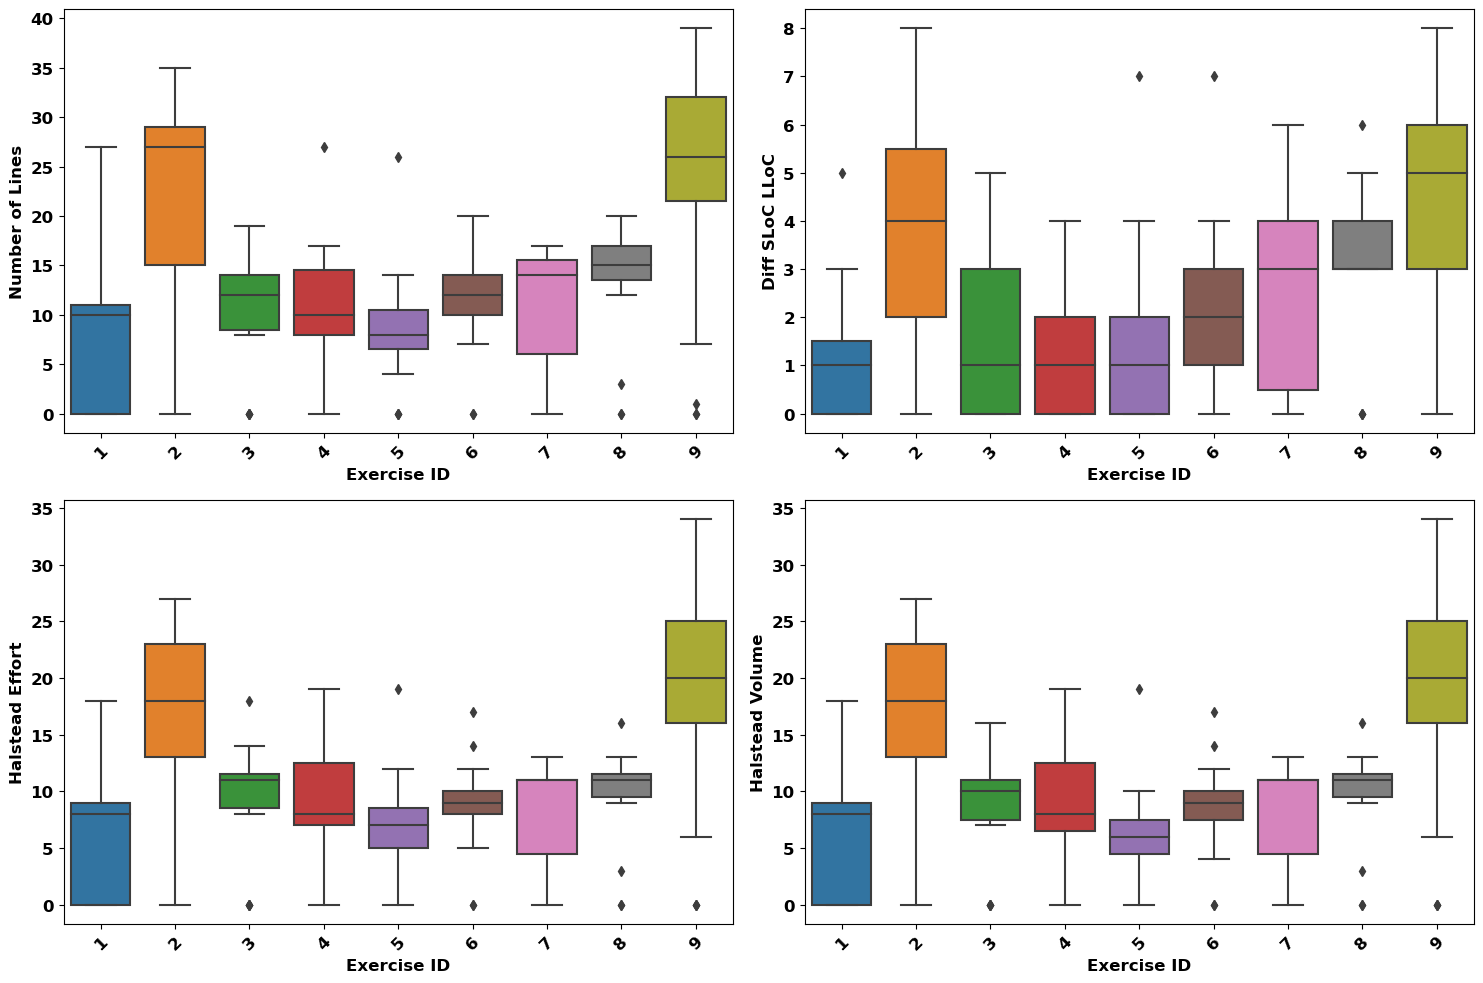

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Increase font size and make text bold
plt.rcParams.update({'font.size': 12, 'font.weight': 'bold'})

# Plot for Number_of_Lines
sns.boxplot(ax=axes[0, 0], x='exercise_id', y='Number_of_Lines', data=code_metrics_df)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)  # Rotate x-ticks
axes[0, 0].set_title('')  # Remove title
axes[0, 0].set_xlabel('Exercise ID', fontweight='bold')  # Bold x-axis label
axes[0, 0].set_ylabel('Number of Lines', fontweight='bold')  # Bold y-axis label

# Plot for Diff_SLoC_LLoC
sns.boxplot(ax=axes[0, 1], x='exercise_id', y='Diff_SLoC_LLoC', data=code_metrics_df)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)  # Rotate x-ticks
axes[0, 1].set_title('')  # Remove title
axes[0, 1].set_xlabel('Exercise ID', fontweight='bold')  # Bold x-axis label
axes[0, 1].set_ylabel('Diff SLoC LLoC', fontweight='bold')  # Bold y-axis label

# Plot for Halstead_Effort
sns.boxplot(ax=axes[1, 0], x='exercise_id', y='Halstead_Effort', data=code_metrics_df)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)  # Rotate x-ticks
axes[1, 0].set_title('')  # Remove title
axes[1, 0].set_xlabel('Exercise ID', fontweight='bold')  # Bold x-axis label
axes[1, 0].set_ylabel('Halstead Effort', fontweight='bold')  # Bold y-axis label

# Plot for Halstead_Volume
sns.boxplot(ax=axes[1, 1], x='exercise_id', y='Halstead_Volume', data=code_metrics_df)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)  # Rotate x-ticks
axes[1, 1].set_title('')  # Remove title
axes[1, 1].set_xlabel('Exercise ID', fontweight='bold')  # Bold x-axis label
axes[1, 1].set_ylabel('Halstead Volume', fontweight='bold')  # Bold y-axis label

# Adjust layout
plt.tight_layout()
plt.show()